In [44]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

## 회귀
- 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음 .
- 두 변수 사이에 일대일로 대응되는 확률적,통계적,상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
- 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수, a,b를 찾는 과정이 단순 회귀분석 알고리즘


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



In [46]:
df= pd.read_excel('dataset/auto-mpg.xlsx')
ndf= df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [47]:
import warnings
warnings.filterwarnings('ignore')

ndf['horsepower']= ndf.horsepower.replace('?',np.nan)
ndf.dropna(subset=['horsepower'],axis=0, inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [48]:
# !pip install openpyxl

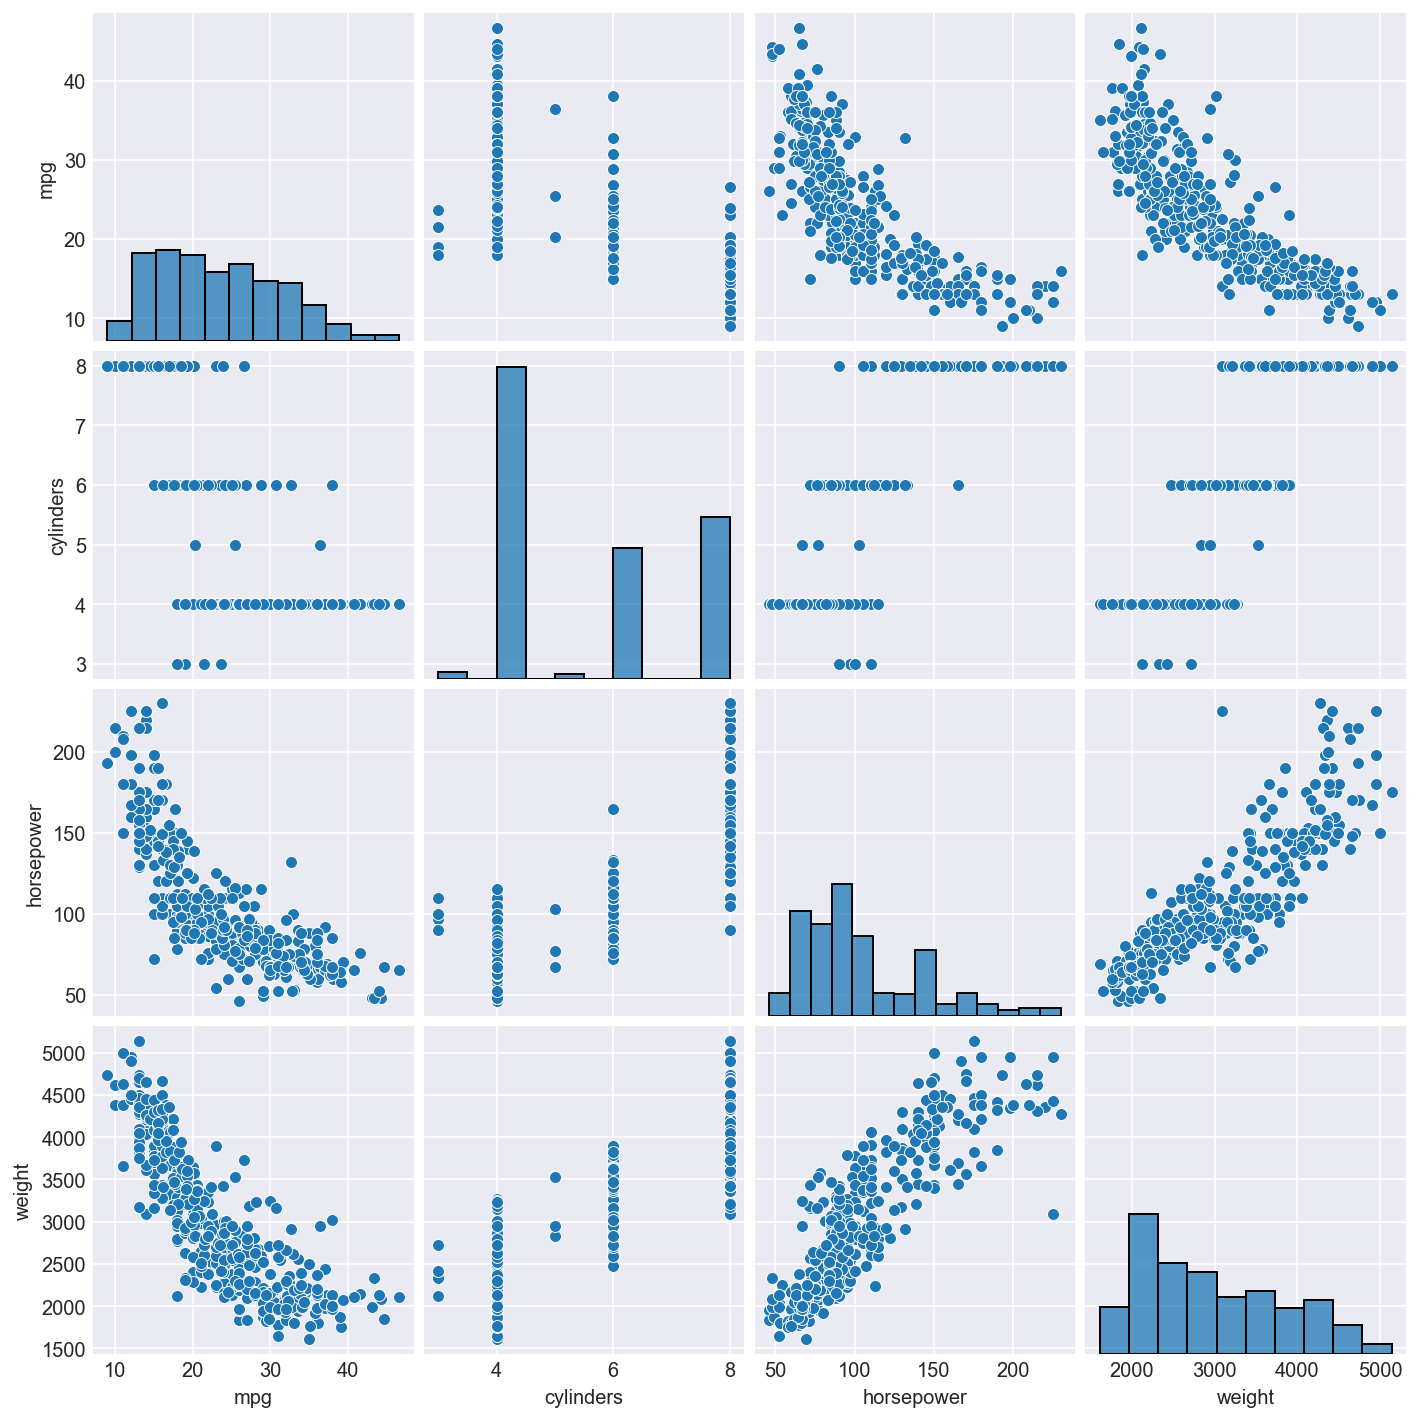

In [49]:
sns.pairplot(ndf)

In [50]:
# 단순선형회귀 

# 변수(속성) 선택
X = ndf[['weight']]  # 독립변수
y = ndf['mpg']  # 종속변수

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=11)


In [51]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression() # lr은 LinearRegression 능력울 다 갖고있음
lr.fit(X_train, y_train)
y_preds= lr.predict(X_test)
y_preds[:5]

array([29.27985295, 25.65957977, 27.90795996, 24.97363328, 15.02740907])

## 회귀 평가 지표
- MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE: 실제값과 예측값의 차이를 제곱해 평균한 것 
- RMSE:MSE에 루트를 씌운 것(실제 오류 평규보다 커지는 것 보정)
- R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

mse= mean_squared_error(y_test, y_preds)
rmse= np.sqrt(mse)
r2= r2_score(y_test,y_preds)
print('MSE:{:.3f},RMSE:{:.3f},R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:22.169,RMSE:4.708,R2 score:0.641


In [53]:
print('기울기a :',lr.coef_)
print('절편 b:', lr.intercept_)

기울기a : [-0.00762163]
절편 b: 45.971217704757684


<AxesSubplot:ylabel='Frequency'>

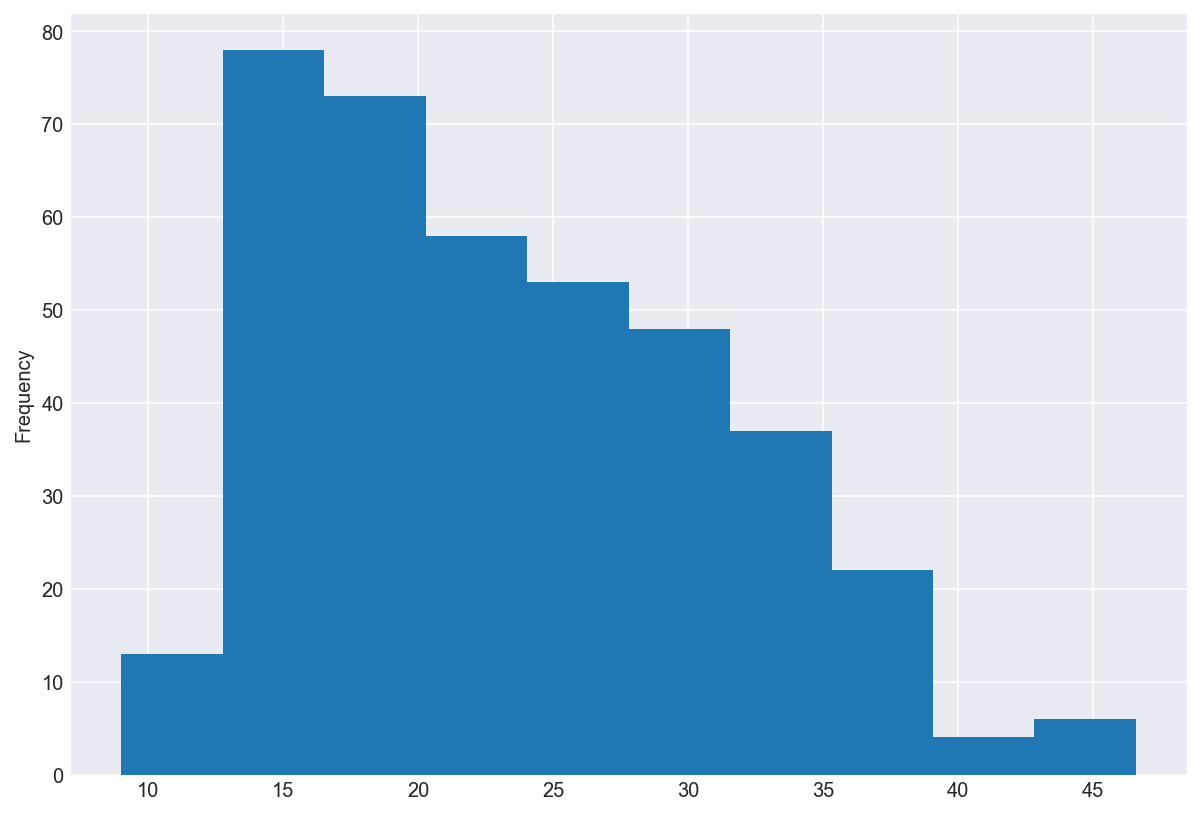

In [54]:
y.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

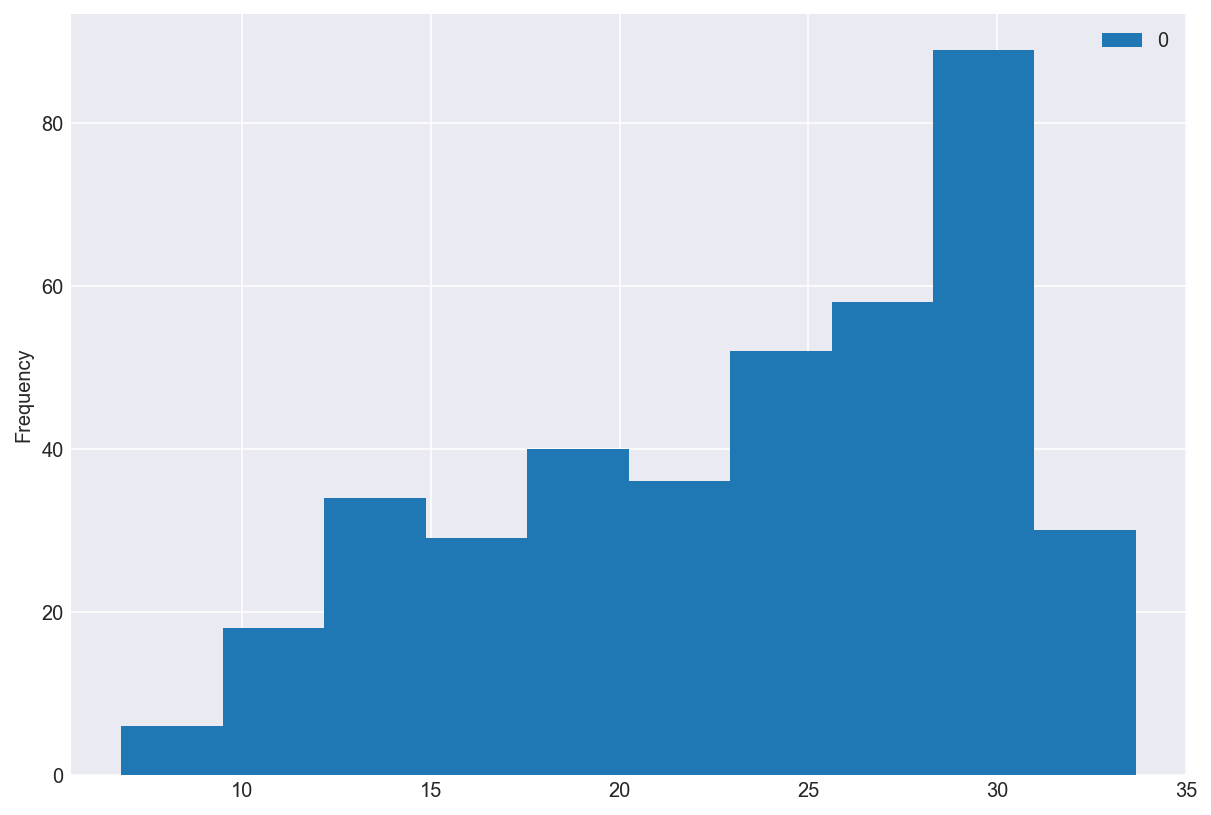

In [55]:
y_hat= lr.predict(X)
pd.DataFrame(y_hat).plot(kind='hist')

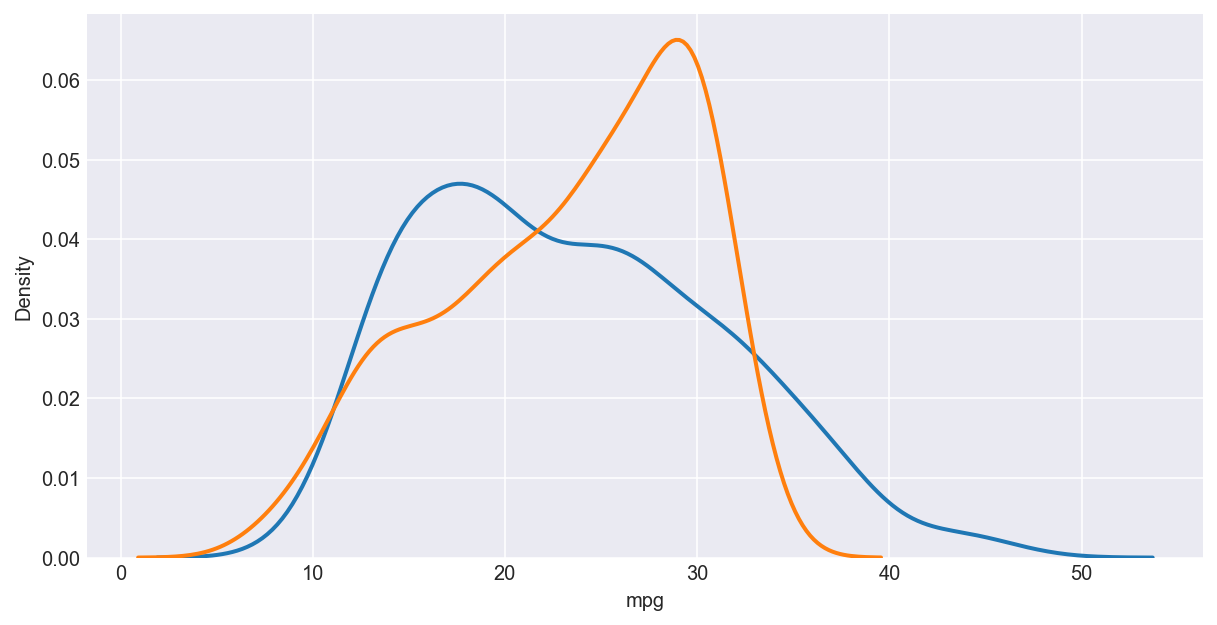

In [56]:
plt.figure(figsize=(10,5))
ax1= sns.distplot (y,hist=False,label='y')
ax2= sns.distplot(y_hat,hist=False,label='y_hat')

## 다항 회귀분석 
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관 

In [59]:
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [126]:
# 변수(속성) 선택
X = ndf[['weight']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)

In [127]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변환

print(X_train.shape)
print(X_train_poly.shape)
print(X_train_poly[:5])

(274, 1)
(274, 3)
[[1.0000000e+00 2.7200000e+03 7.3984000e+06]
 [1.0000000e+00 3.9070000e+03 1.5264649e+07]
 [1.0000000e+00 2.3000000e+03 5.2900000e+06]
 [1.0000000e+00 2.0650000e+03 4.2642250e+06]
 [1.0000000e+00 4.6330000e+03 2.1464689e+07]]


In [128]:
# score 사용
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.6721104316263575

In [129]:
# r2_score() 사용
from sklearn.metrics import r2_score
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
y_preds_poly = pr.predict(X_test_poly)
r_square= r2_score(y_test,y_preds_poly)
r_square

0.6721104316263575

Text(0, 0.5, 'mpg')

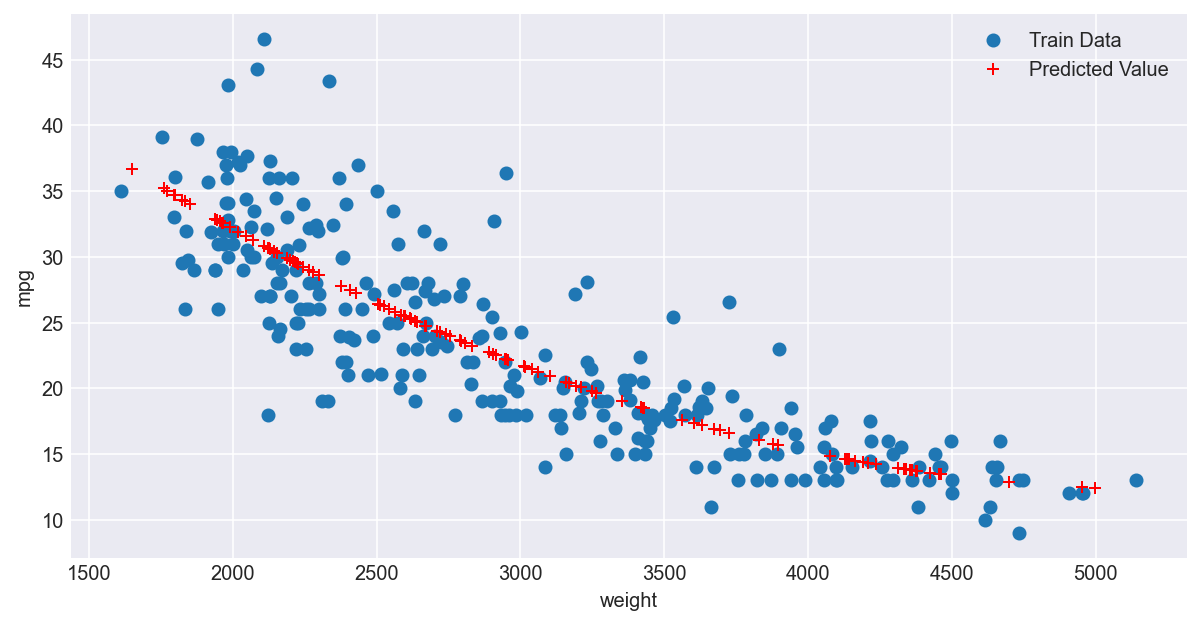

In [130]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test, 'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

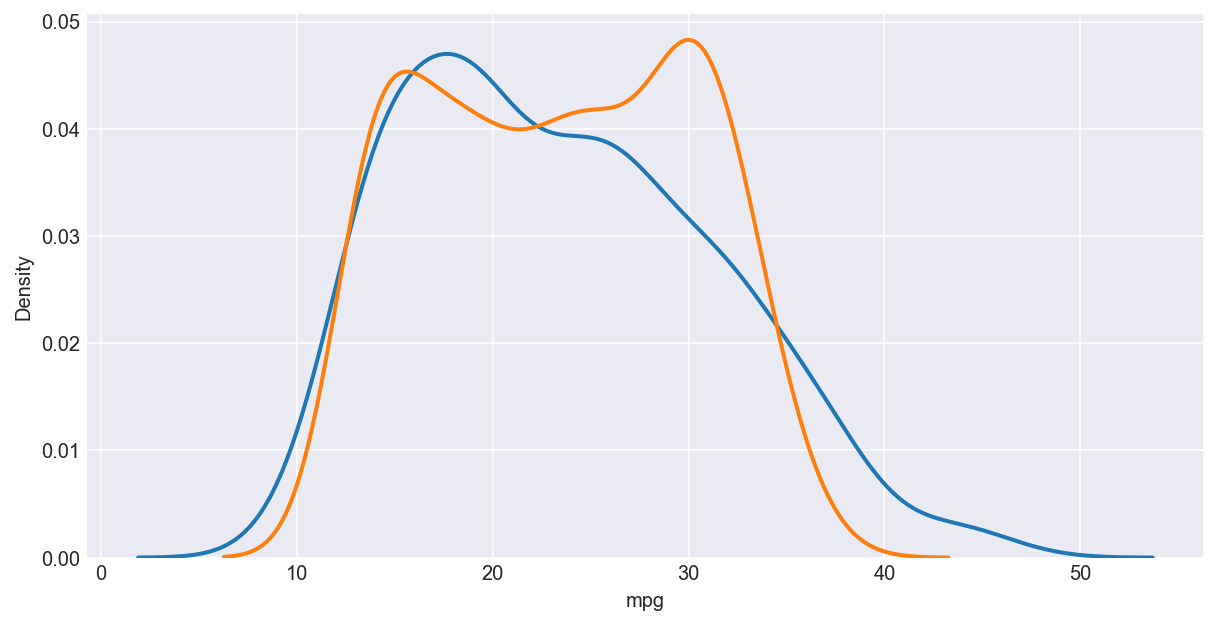

In [131]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')

## 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습


In [80]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [132]:
X=ndf[['cylinders','horsepower','weight']]
y=ndf['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:19.674, RMSE:4.436, R2 score:0.680


In [133]:
print('X변수의 계수:',lr.coef_)
print('절편:',lr.intercept_)

X변수의 계수: [-0.57598375 -0.03393439 -0.00537578]
절편: 45.99088694107769


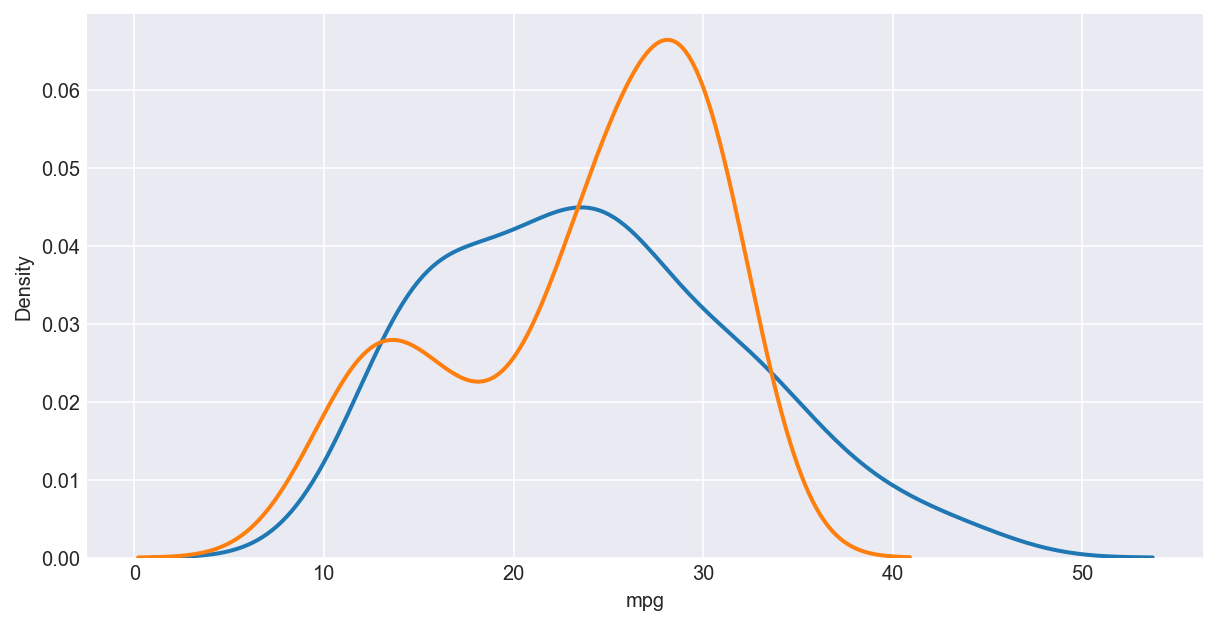

In [134]:
y_hat= lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1= sns.distplot(y_test, hist=False, label='y_test')
ax2= sns.distplot(y_hat, hist=False, label='y_hat')


In [93]:
# 스케일링 
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df= pd.DataFrame(data=ndf_ms, columns=ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.456522,0.536150
1,0.159574,1.0,0.646739,0.589736
2,0.239362,1.0,0.565217,0.516870
3,0.186170,1.0,0.565217,0.516019
4,0.212766,1.0,0.510870,0.520556


In [94]:
X= ndf_ms_df[['cylinders','horsepower','weight']]
y=ndf_ms_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
lr= LinearRegression()
lr.fit(X_train, y_train)
y_preds= lr.predict(X_test)

r2= r2_score(y_test,y_preds)
mse= mean_squared_error(y_test,y_preds)
rmse= np.sqrt(mse)

print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:0.014, RMSE:0.118, R2 score:0.680


<AxesSubplot:xlabel='mpg', ylabel='Density'>

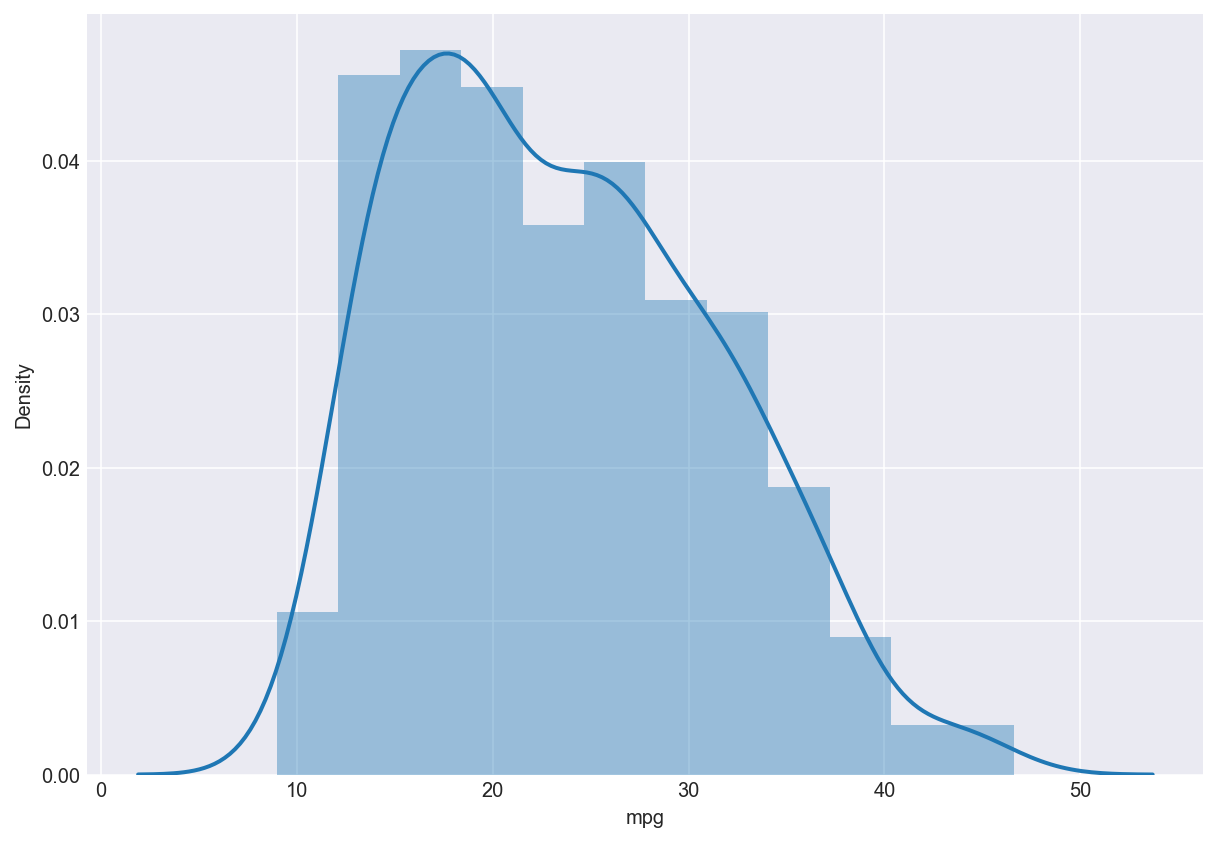

In [99]:
sns.distplot(ndf.mpg)

<AxesSubplot:title={'center':'Standart Trasformed npg Histogram'}, ylabel='Density'>

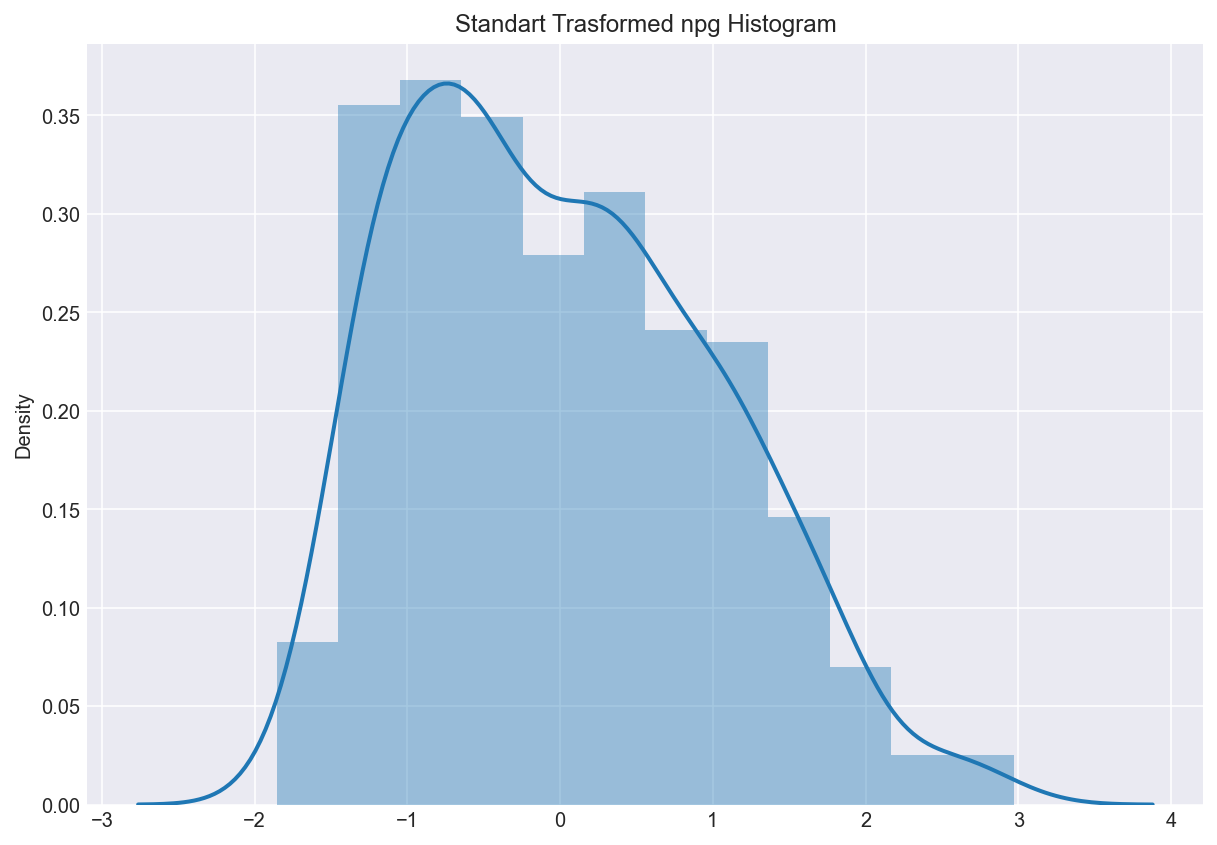

In [115]:
# standardscaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data= scaler.fit_transform(ndf[['mpg']])
scaled_data_df= pd.DataFrame(data= scaled_data)

plt.title('Standart Trasformed npg Histogram')
sns.distplot(scaled_data_df)

<AxesSubplot:xlabel='mpg', ylabel='Density'>

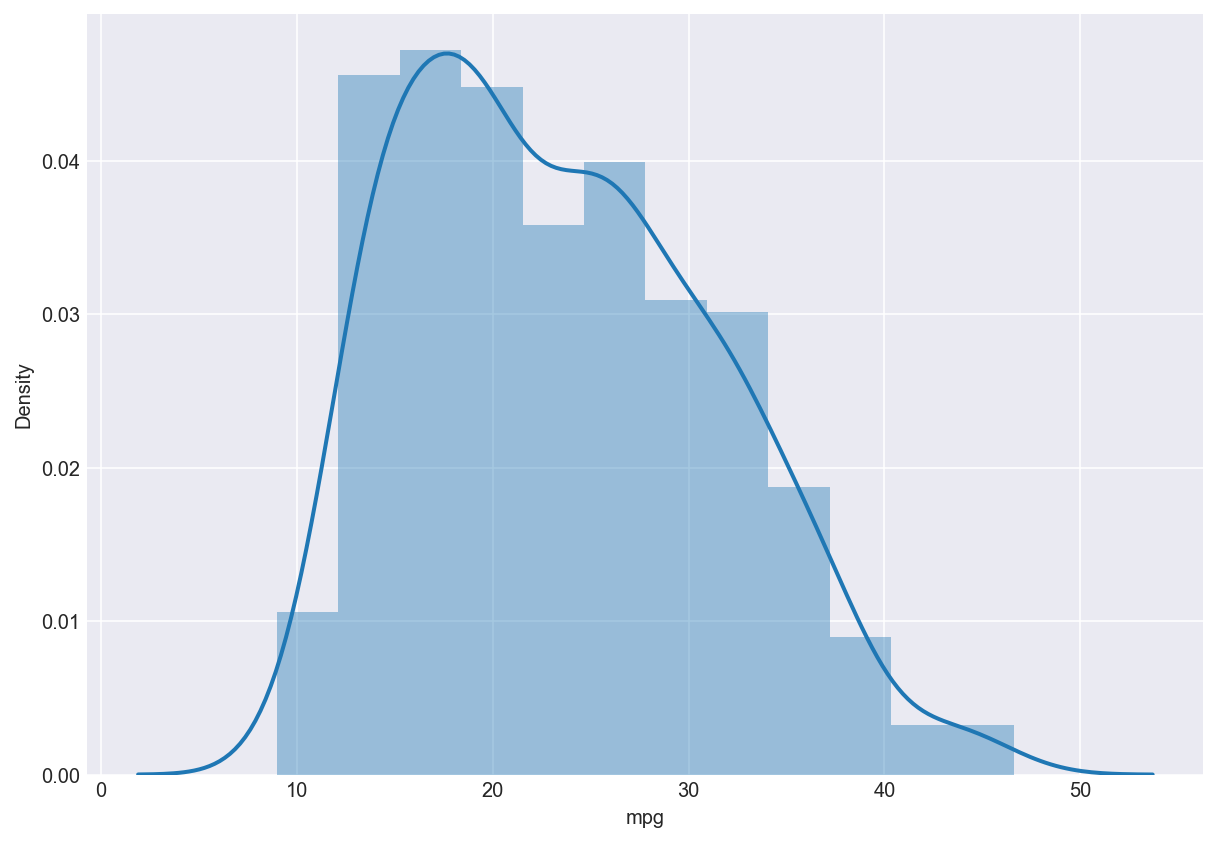

In [117]:
sns.distplot(ndf.mpg)



<AxesSubplot:xlabel='mpg', ylabel='Density'>

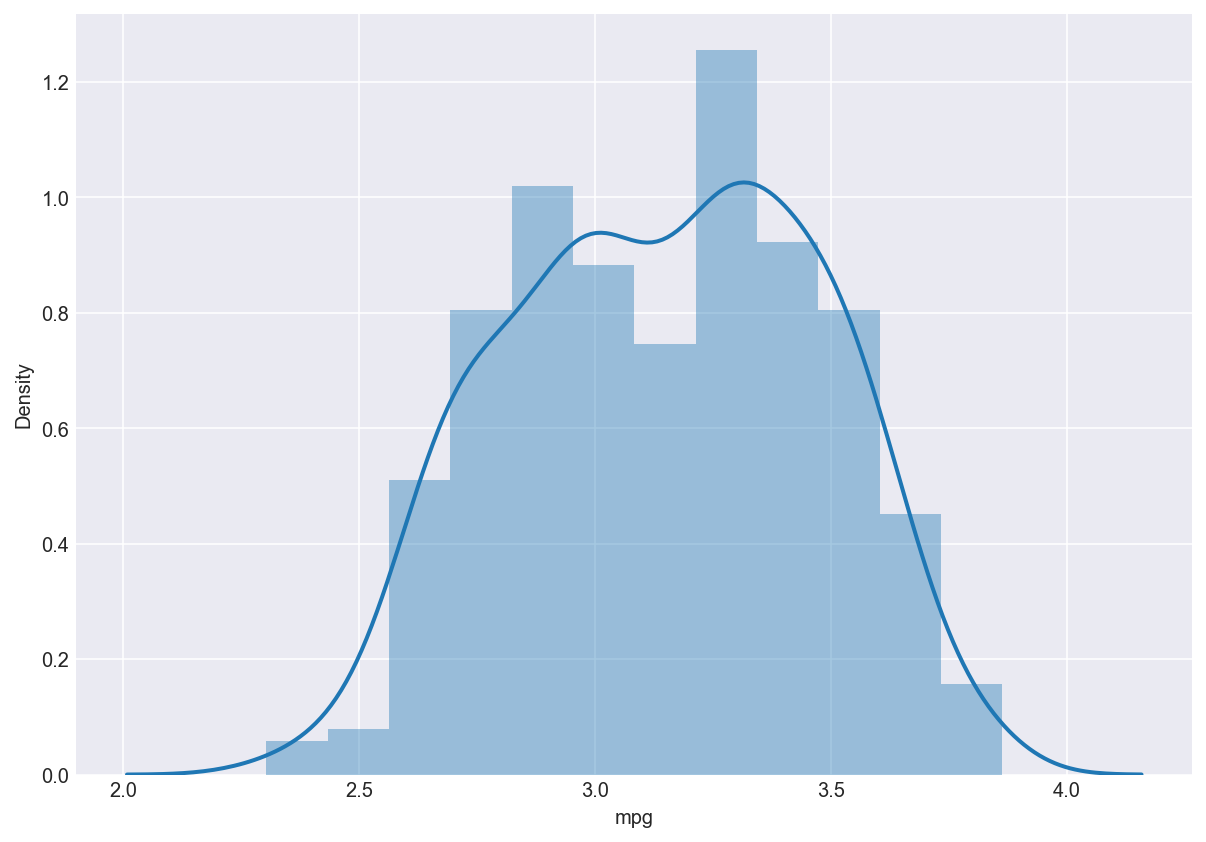

In [119]:
log_mpg= np.log1p(ndf['mpg'])
sns.distplot(log_mpg)


# skewness 확인
# np.log만 하게되면 ... 변환할 때 부작용이 있어서 np.log1p를 쓰는게 좋음

개별 feature, 또는 target의 분포도가 skew가 심하면 log 변환을 합니다. 
Standard Scaler는 일반적으로 선형기반의 머신러닝의 입력 (전체) 데이터들에 대해서 다 적용합니다.  
보통 scaling은 전체 feature들에(카테고리성 피처 제외) 다 적용합니다. 

Skew가 심하면 로그 변환, 
전체 데이터의 스케일링을 표준 정규 분포 형태로 맞추고 싶다면 Standard Scaler를 적용합니다
(선형 기반의 머신러닝의 입력에서 MinMax나 Standard scaler를 선호는 합니다)



In [120]:
# 과제 
# Q. 로그 변환된 종속변수를 적용하여 다중회귀 분석결과를 평가하세요.
# ( r_squared , MSE, log변환된 RMSE )

